Let's post a request to the container

In [9]:
import os
import json
import requests
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test[..., np.newaxis]/255.0

In [36]:
# picking up a random image from the test set for prediction
IMG_NUM = np.random.randint(0, len(x_test))
json_data = json.dumps({"signature_name": "serving_default", "instances": x_test[[IMG_NUM]].tolist()})

In [38]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mnist_digit:predict', data=json_data, headers=headers)

predictions = json.loads(json_response.text)['predictions']
predictions = np.array(predictions).argmax()

print('The predicted result is ',predictions)

The predicted result is  9


True Label:  9
Predicted Label:  9


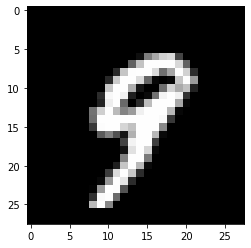

In [39]:
print('True Label: ',y_test[IMG_NUM])
print('Predicted Label: ',predictions)
plt.imshow(x_test[IMG_NUM].reshape(28,28), cmap = 'gray');

We can post multiple requests as well.  
Let's try with 5 images.

In [49]:
# picking up a random image from the test set for prediction
IMG_NUM = np.random.randint(0, len(x_test), 5)
json_data = json.dumps({"signature_name": "serving_default", "instances": x_test[[IMG_NUM]].tolist()})

/home/prashant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
for idx in IMG_NUM:
    label = y_test[idx]
    print('The label is ', label)

The label is  3
The label is  9
The label is  4
The label is  9
The label is  0


In [60]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mnist_digit:predict', data=json_data, headers=headers)

predictions = json.loads(json_response.text)['predictions']
for pred in predictions:
    prediction = np.array(pred).argmax()
    print('The predicted result is ', prediction)

The predicted result is  3
The predicted result is  9
The predicted result is  4
The predicted result is  9
The predicted result is  0


We can see that we are able to get it right with multiple predictions as well!